<a href="https://colab.research.google.com/github/baranouskiart/fiverr-crm_consultant/blob/main/crm_exprerts_fiverr_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task Description
Source: https://github.com/baranouskiart/fiverr-crm_consultant/blob/main/fiverr.csv



In [45]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
url = 'https://raw.githubusercontent.com/baranouskiart/fiverr-crm_consultant/main/fiverr.csv'

In [47]:
df = pd.read_csv(url, error_bad_lines=False)
df.head(1)

<ipython-input-47-33584d05f30d>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(url, error_bad_lines=False)


,media href,Y1BXLWZ,ziXAPIc src,text-bold href,mgCk4Qq,tbody-6,Bh6SL1u,rating-score,ratings-count,rating-count-number,text-bold 2
0,https://www.fiverr.com/masdouk_zoho/be-your-zo...,M,https://fiverr-res.cloudinary.com/t_profile_th...,https://www.fiverr.com/masdouk_zoho?source=gig...,Masdouk A.,FIVERR'S,"I will be your zoho expert, zoho developer and...",5.0,(),150.0,€96


In [48]:
# Rename columns for readability
column_names = [
    "Profile Link", "Profile Code", "Profile Image", "Gig Link", "Freelancer Name", "Level", "Description",
    "Rating Score", "Ratings Count Convert", "Reviews Count", "Price"
]
df.columns = column_names

# Remove dashes from column names
df.columns = df.columns.str.replace(' ', '_')

In [57]:
df.describe()

,Level,Rating_Score,Reviews_Count,Price
count,289.000000,533.000000,533.000000,1008.000000
mean,1.387543,4.944653,8.842402,50.502976
std,0.488034,0.208545,18.363844,99.829020
min,1.000000,3.000000,1.000000,1.000000
25%,1.000000,5.000000,1.000000,10.000000
50%,1.000000,5.000000,3.000000,20.000000
75%,2.000000,5.000000,8.000000,48.000000
max,2.000000,5.000000,154.000000,958.000000


## Data Preprocessing


In [50]:
# Extract relevant information (name, level, rating, price) from the available columns
df['Price'] = df['Price'].str.extract(r'€(\d+)').astype(float)

In [51]:
df['User_Name'] = df['Gig_Link'].str.split('/').str[-1].str.split('?').str[0]

In [53]:
df['Level'] = df['Level'].str.extract(r'Level (\d+)').astype(float)
df['Rating_Score'] = df['Rating_Score'].astype(float)

In [54]:
num_nan = df['Level'].isna().sum()
num_not_nan = df['Level'].notna().sum()

In [56]:
num_not_nan

289

## *Answer Pain Questions*

In [58]:
mean_rating = df['Rating_Score'].mean()
median_price = df['Price'].median()
std_dev_orders = df['Reviews_Count'].std()

In [59]:
print(df[['Freelancer_Name', 'Level', 'Rating_Score', 'Price']])

      Freelancer_Name  Level  Rating_Score  Price
0          Masdouk A.    NaN           5.0   96.0
1          Emmanuel O    2.0           5.0   10.0
2           Steve Joe    1.0           5.0   15.0
3          Crm Expert    NaN           4.3    5.0
4                Joel    NaN           4.9   96.0
...               ...    ...           ...    ...
1003      Zoho Expert    NaN           NaN   58.0
1004            Ikram    NaN           5.0   15.0
1005    Gazal Folarin    1.0           NaN   20.0
1006  johnny_johnny01    NaN           NaN    5.0
1007         Victor F    NaN           NaN    5.0

[1008 rows x 4 columns]


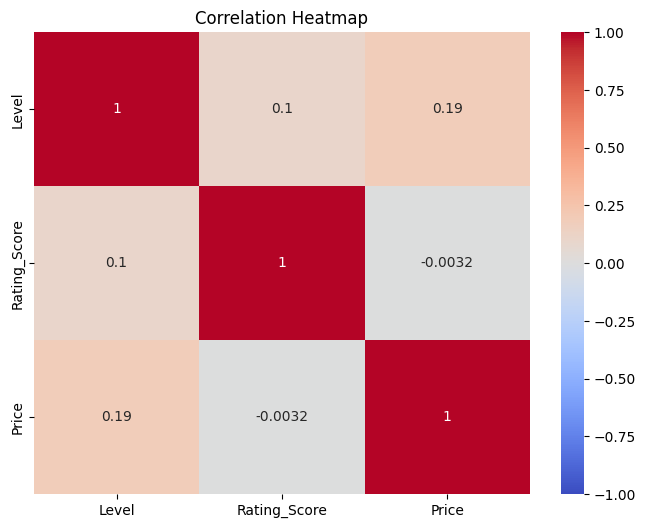

In [60]:
# Assuming you have already loaded and preprocessed the data into the df DataFrame

# Select relevant columns for correlation analysis
correlation_columns = ["Level", "Rating_Score", "Price"]
correlation_df = df[correlation_columns]

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data=correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Answer Pain Questions
# Example questions: What services does each seller provide? What is their pricing? What is their expertise level?
# Print a summary of the extracted information
print(df[['name', 'level', 'rating', 'price']])

# Data Analysis and Correlation
# Calculate statistical measures for variables like ratings, number of orders, and prices


# Calculate correlation between price and level
correlation_price_level = df['price'].corr(df['level'].astype(float))

# Print the calculated statistics
print(f"Mean Rating: {mean_rating:.2f}")
print(f"Median Price: €{median_price:.2f}")
print(f"Standard Deviation of Orders: {std_dev_orders:.2f}")
print(f"Correlation between Price and Level: {correlation_price_level:.2f}")

# Visualization
# Create a scatter plot to visualize the correlation between price and level
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='level', hue='rating', size='ratings-count', sizes=(30, 200))
plt.title('Correlation between Price and Level')
plt.xlabel('Price (€)')
plt.ylabel('Level')
plt.show()

# Analyzing CRM System Popularity and NaN Values
# Let's see the most popular CRM system from the seller's side
popular_crm = df['media_href'].str.extract(r'fiverr.com/([^/]+)').value_counts().idxmax()

# Count NaN values in the level column for each CRM system
nan_count_by_crm = df.groupby('media_href')['level'].apply(lambda x: x.isna().sum())

# Print the results
print(f"Most Popular CRM System for Sellers: {popular_crm}")
print("NaN Counts by CRM System:")
print(nan_count_by_crm)

In [ ]:
df.head(10)

In [ ]:
import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_33, *['index', 'tbody-6'], **{'inner': 'stick'})
chart

In [ ]:
import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_33, *['index', 'tbody-6'], **{'inner': 'stick'})
chart

In [ ]:
import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_14, *['index', 'text-bold 2'], **{'inner': 'stick'})
chart

In [ ]:

# Print the updated column names
print("Updated Column Names:")
print(df.columns)

# Continue with the rest of the code as provided in the previous response...